In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import operator

In [63]:
def plot_best_fit(weights):
    '''
    desc:
        画出拟合图形
    param:
        weight 回归系数
    return none
    '''
    # 载入数据后 定义不同类别 点变量 分类别 按不同列一个值一个值加 组成点
    dataMat,labels=loadDataSet()
    x_cord1=[]
    y_cord1=[]
    x_cord2=[]
    y_cord2=[]
    dataArr=np.array(dataMat)
    n=np.shape(dataMat)[0]
    for i in range(n):
        if labels[i]==1:
            #x_cord1.append(dataArr[i,])???
            #print('dataArr[i,1]',dataArr[i,1])
            #print('dataArr[i,2]',dataArr[i,2])
            x_cord1.append(dataArr[i,1])# 类别1第1列的值
            y_cord1.append(dataArr[i,2])# 类别1第2列的值 两个值组成一个点
        else:
            x_cord2.append(dataArr[i,1])
            y_cord2.append(dataArr[i,2])
    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(x_cord1,y_cord1,s=30, color='k', marker='^')
    ax.scatter(x_cord2, y_cord2, s=30, color='red', marker='s')
    x = np.arange(-3.0, 3.0, 0.1)
    y=(-weights[0] - weights[1] * x) / weights[2]
    plt.plot(x,y)
    plt.show()

In [49]:
def loadDataSet():
    '''
    desc:
        加载数据
    param:
        inX 传入文件路径
    return:
        dataMat,labelMat 返回数组
    
    '''
    fr=open('E:/github/MachineLearning/input/5.Logistic/TestSet.txt')
    dataMat,labelMat=[],[]
    for line in fr.readlines():
        lineStr=line.strip().split('\t')
        ####################################dataMat.append(lineStr[0:2])  报错
        #dataMat.append([1.0,lineStr[0],lineStr[1]])
        dataMat.append([1.0,float(lineStr[0]),float(lineStr[1])])
        labelMat.append(int(lineStr[-1]))############int() 读取数据要注意
    return dataMat,labelMat

In [56]:
def sigmoid(inX):
    '''
    desc:
        阶跃函数
    param: inX 输入参数
    return h
    
    '''
    h=1.0/(1+np.exp(-inX))
    # tanh 是 sigmoid 变形  是0均值 比sigmoid 效果更好
    #h=2*1.0/(1+exp(-inX*2))-1
    #print(h)
    return h

In [37]:
def gradAscent(inX,classLabels):
    '''
    desc:
        根据数据 计算回归系数
    param:
        inX:特征数据
        labels:标签
    return:
        weights: 回归系数
    '''
    #1 将数据转换为矩阵或向量 定义回归系数向量
    dataMat=np.mat(inX)
    labels=np.mat(classLabels).transpose()
    m,n=np.shape(dataMat)
    #weights=np.zeros(m,1)
    #weights=np.zeros((n,1))
    weights=np.ones((n,1))
    #2 设置迭代次数 循环 f(x)=dataMat*weight 代入sigmoid 函数  算出误差 和回归系数
    maxCycles=500
    alpha=0.001
    for i in range(maxCycles):
        #print(np.shape(dataMat))
        #print('\n',weights)
        h=sigmoid(dataMat*weights)
        error=labels-h
        #weight=error+alpha*dataMat*error
        weights=weights+alpha*dataMat.transpose()*error
    return np.array(weights)

In [78]:
def gradAscent0(dataArr,labels):
    '''
    desc:
        随机梯度提升
    param:
        ...
    return:
        weights
    
    '''
    #dataMat=np.mat(inX)
    #classes=np.mat(labels).transpose()  不是矩阵了
    m,n=np.shape(dataArr)
    #weights=np.ones((n,1))
    weights=np.ones(n)
    #error=0.0
    alpha=0.01
    #maxCycls=500
    #for i in range(maxCycls):
    for i in range(m):
        h=sigmoid(sum(dataArr[i]*weights))
        error=labels[i]-h
        weights=weights+error*dataArr[i]*alpha
    return weights

In [165]:
def gradAscent1(dataArr,labels,num_cycle=150):
    '''
    desc:
        改进随机梯度上升算法
    param:
        ..
    return:
        weights
    '''
    m,n=np.shape(dataArr)
    weights=np.ones(n)
    for i in range(num_cycle):
        data_index=list(range(m))# 3 改进 定义范围 循环一次在这范围删除这次随机生成的数
        for j in range(m):
            alpha=4/(1.0+j+i)+0.01#1.改进alpha
            randomIndex=int(np.random.uniform(0,len(data_index)))#2 改进 生成随机数 
            #h=sigmoid(sum(dataArr[j]*weights))
            h=sigmoid(sum(dataArr[data_index[randomIndex]]*weights))
            error=labels[data_index[randomIndex]]-h
            weights=weights+error*alpha*dataArr[data_index[randomIndex]]
            del(data_index[randomIndex])
    return weights

In [142]:
def testLR():
    '''
    Desc:
        用逻辑回归测试
    param:
        none
    return:
        none
    
    '''
    #1 收集准备数据
    dataMat,labelMat=loadDataSet()
    #print(dataMat,'------\n label',labelMat)
    # 2.训练模型，求出回归系数weight  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值 
    dataArr=np.array(dataMat)
    weights=gradAscent1(dataArr,labelMat)   ###.getA()
    #print(weights)
    plot_best_fit(weights)

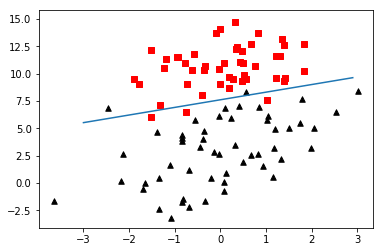

In [143]:
if __name__=='__main__':
    testLR()
    

# 项目二
~ 从疝气病症预测病马的死亡率 

In [152]:
def classifyLR(inX,weights):
    '''
    desc:
        逻辑回归分类
    param:
        inX 
    return:
        labels
    '''
    if sigmoid(sum(inX*weights))>0.5:
        return 1.0
    else:
        return 0.0

In [161]:
def colic_test():
    '''
    desc:
        预测死亡率
    param:
        None
    return:
        None
    
    '''
    # 1 加载数据
    trainSet=open('E:/github/MachineLearning/input/5.Logistic/HorseColicTraining.txt')
    testSet=open('E:/github/MachineLearning/input/5.Logistic/HorseColicTest.txt')
    trainData=[]
    trainClass=[]
    #for line in trainSet:
    for line in trainSet.readlines():
        
        lineStr=line.strip().split('\t')
        if len(lineStr)==1:
            continue
        #trainData.append([float(line[:-1][i]) for i in len(lineStr[:-1])]) ????? 怎么处理
        trainData.append([float(lineStr[i]) for i in range(len(lineStr)-1)])
        trainClass.append(float(lineStr[-1]))
        ##print(trainClass)
    #2 训练数据 f(x) 求出回归系数 weights
    trainArr=np.array(trainData)
    #print(trainArr)
    #print(trainClass)
    #train_weights=gradAscent1(trainArr,trainClass)
    train_weights=gradAscent1(trainArr,trainClass,500)
    #lot_best_fit2(train_weights)
    #labels=classifyLR()
    # 3 载入测试 数据
    testData=[]
    testLabel=[]
    error=0
    test_num=0
    for row in testSet.readlines():##############一次读取1行
        rowStr=row.strip().split('\t')
        test_num+=1
        if len(rowStr)==1:
            continue
        #testData.append([float(rowStr[i]) for i in range(len(rowStr)-1)])
        test=[float(rowStr[i]) for i in range(len(rowStr)-1)]
        #testLabel.append(float(rowStr[-1]))
        label=classifyLR(np.array(test),train_weights)
        if int(label) !=int(rowStr[-1]):
            error+=1
            print('classify is %s,the real label is %s' %(label,rowStr[-1]))
    #print('error ratio is ',error/len(rowStr))
    print('error ratio is ',error/int(test_num))
    errorRatio=error/int(test_num)
    return errorRatio

In [ ]:
def plot_best_fit2(weights,trainArr,trainClass):
    x_cord1=[]
    y_cord1=[]
    x_cord2=[]
    y_cord2=[]
    m,n=np.shape(trainArr)[0]
    for i in range(m):
        if trainClass[i]==1:
            x_cord1.append(trainArr[i,1])
            y_cord1.append(trainArr[i,2])
        else:
            x_cord2.append(trainArr[i,1])
            y_cord2.append(trainArr[i,2])
    ax.scatter(x_cord1,y_cord1)
    x=np.range()
    y=
    plt.plot(x,y)

In [159]:
if __name__ == '__main__':
    colic_test()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 1.0,the real label is 0
classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
error ratio is  0.3582089552238806


In [160]:
for i in range(21):
    #print(i)
    
#print(len(range(21)))    

SyntaxError: unexpected EOF while parsing (<ipython-input-160-8fcde7f9b756>, line 4)

In [162]:
def multi_test():
    '''
    desc:
        多次测试 取平均值
        
    return: errorRatio
    '''
    sumErrorR=0
    m=10
    for i in range(m):
        errorRatio=colic_test()
        sumErrorR=sumErrorR+errorRatio
    averageError=sumErrorR/m
    print('average error ratio is ',averageError)

In [166]:
multi_test()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 1.0,the real label is 0
classify is 1.0,the real label is 0
classify is 1.0,the real label is 0
classify is 1.0,the real label is 0
classify is 0.0,the real label is 1
classify is 1.0,the real label is 0
classify is 1.0,the real label is 0
error ratio is  0.2835820895522388
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real label is 1
classify is 0.0,the real labe